<a href="https://colab.research.google.com/github/ProGenei/GhadeerNoohT5/blob/main/Time_Series_Forecasting_Practical_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [28]:
5+7

12

In [24]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
# !kaggle datasets download -d khaledzsa/traffic-dataset
# !unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
traffic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  traffic-dataset.zip
replace Traffic Data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [69]:
df = pd.read_csv('/content/drive/My Drive/Trainees - المتدربين/Week 6/5- Weekly Project/Traffic Data.csv', parse_dates=['date_time']) #parse_dates=['']

In [34]:
pip install early-stopping


In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from early_stopping import EarlyStopping


In [ ]:
#seasonal_decompose(df, model='additive', freq=1).plot()

<Axes: xlabel='date_time'>

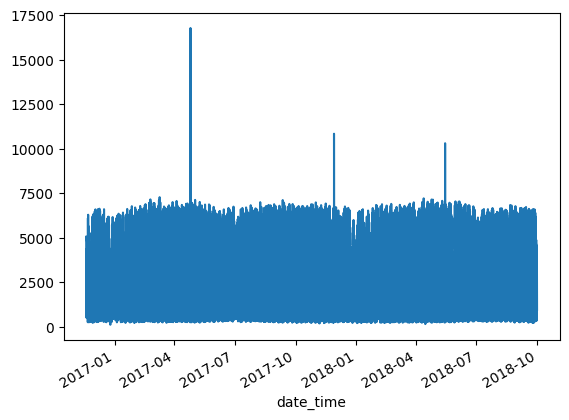

In [99]:
df2 = pd.read_csv('/content/drive/My Drive/Trainees - المتدربين/Week 6/5- Weekly Project/Traffic Data.csv', parse_dates=['date_time']) #parse_dates=['']
df2.set_index('date_time', inplace=True)
df2.sort_index(inplace=True)
df2['traffic_volume'].plot()

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [70]:
df.set_index('date_time', inplace=True)
df.sort_index(inplace=True)

In [211]:
df2['traffic_volume'].fillna(df2['traffic_volume'].ffill(), inplace=True)

In [214]:
df2.sort_index(inplace=True)

In [218]:
seasonal_decompose(x=df['traffic_volume'], model='additive', extrapolate_trend='freq', period=1)

In [ ]:
df.head(50)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog


In [ ]:
df.duplicated().sum()

18

In [71]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [42]:
df.tail()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm
2018-09-30 22:00:00,1450.0,282.09,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 23:00:00,954.0,282.12,0.0,0.0,90,Clouds,overcast clouds


In [43]:
df.isnull().sum()

,0
traffic_volume,0
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0


In [72]:
df['traffic_volume'].fillna(df['traffic_volume'].ffill(), inplace=True)

In [56]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,DayOfTheWeek,Month,DayOfTheYear,diff_traffic_volume
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4,11,2016,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4,11,2016,0.0
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4,11,2016,0.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4,11,2016,202.0
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4,11,2016,0.0


In [38]:
df.ffill()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist
...,...,...,...,...,...,...,...
2018-09-30 19:00:00,3543.0,283.45,0.0,0.0,75,Clouds,broken clouds
2018-09-30 20:00:00,2781.0,282.76,0.0,0.0,90,Clouds,overcast clouds
2018-09-30 21:00:00,2159.0,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm


<Figure size 1200x800 with 0 Axes>

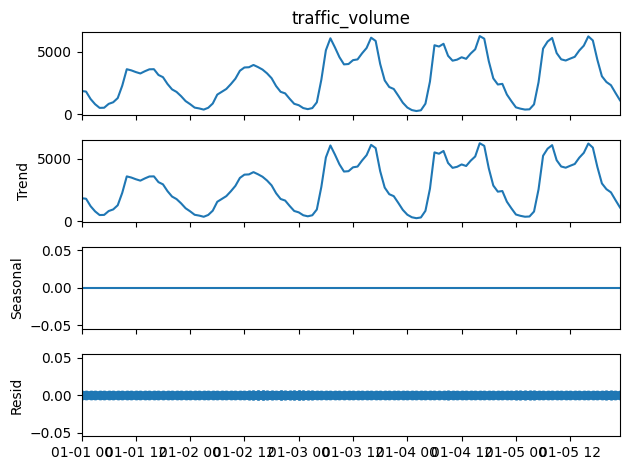

In [233]:
result = seasonal_decompose(x=df['traffic_volume']['2017-01-01':'2017-01-05'], model='additive', extrapolate_trend='freq', period=1)
plt.figure(figsize=(12,8))
result.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

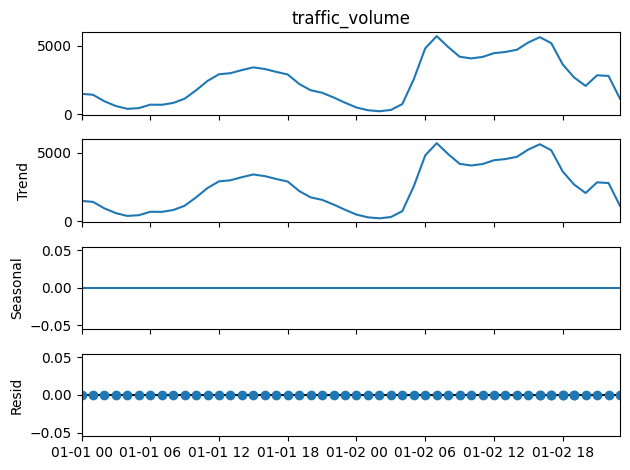

In [234]:
result = seasonal_decompose(x=df['traffic_volume']['2018-01-01':'2018-01-02'], model='additive', extrapolate_trend='freq', period=1)
plt.figure(figsize=(12,8))
result.plot()
plt.show()

<Figure size 1200x800 with 0 Axes>

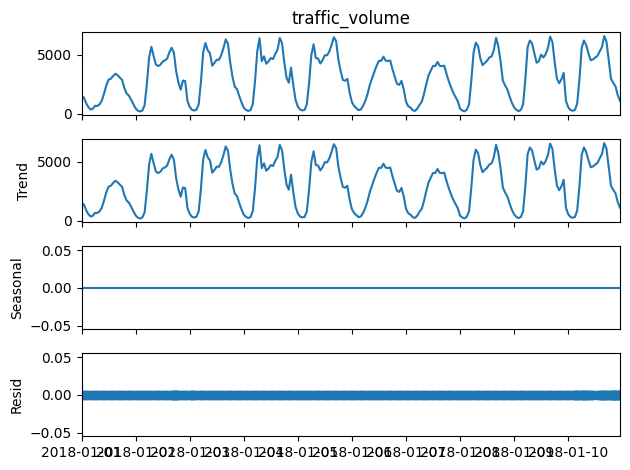

In [231]:
result = seasonal_decompose(x=df['traffic_volume']['2018-01-01':'2018-01-10'], model='additive', extrapolate_trend='freq', period=1)
plt.figure(figsize=(12,8))
result.plot()
plt.show()

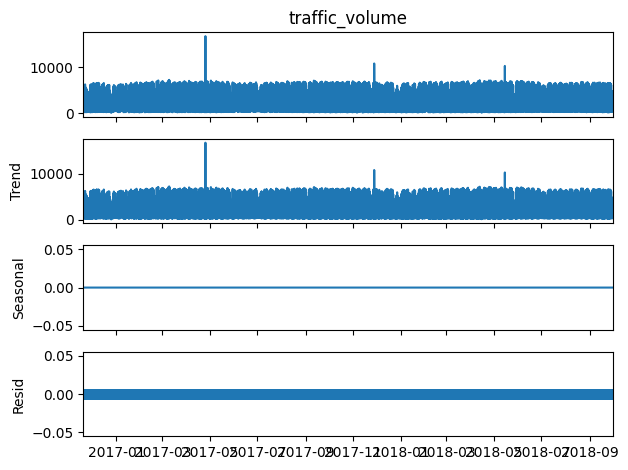

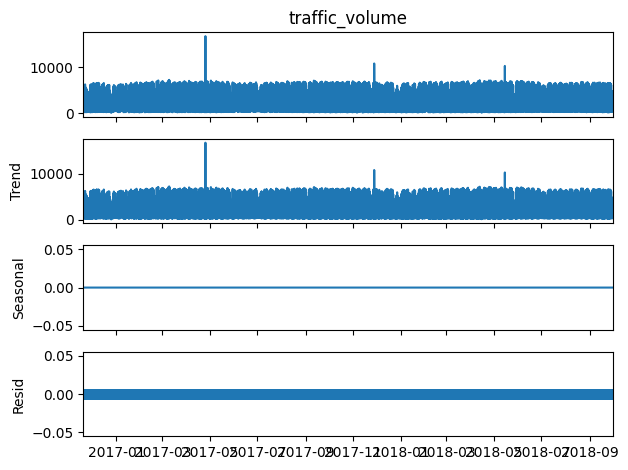

In [228]:
result = seasonal_decompose(x=df['traffic_volume'], model='additive', extrapolate_trend='freq', period=1)

result.plot()

In [ ]:
df.isnull().sum()

,0
traffic_volume,20
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0


## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [73]:
df['DayOfTheWeek'] = df.index.dayofweek
df['Month'] = df.index.month
df['DayOfTheYear'] = df.index.year

,traffic_volume
date_time,
0,"Axes(0.125,0.2;0.775x0.68)"
1,"Axes(0.125,0.2;0.775x0.68)"
2,"Axes(0.125,0.2;0.775x0.68)"
3,"Axes(0.125,0.2;0.775x0.68)"
4,"Axes(0.125,0.2;0.775x0.68)"
5,"Axes(0.125,0.2;0.775x0.68)"
6,"Axes(0.125,0.2;0.775x0.68)"
7,"Axes(0.125,0.2;0.775x0.68)"
8,"Axes(0.125,0.2;0.775x0.68)"


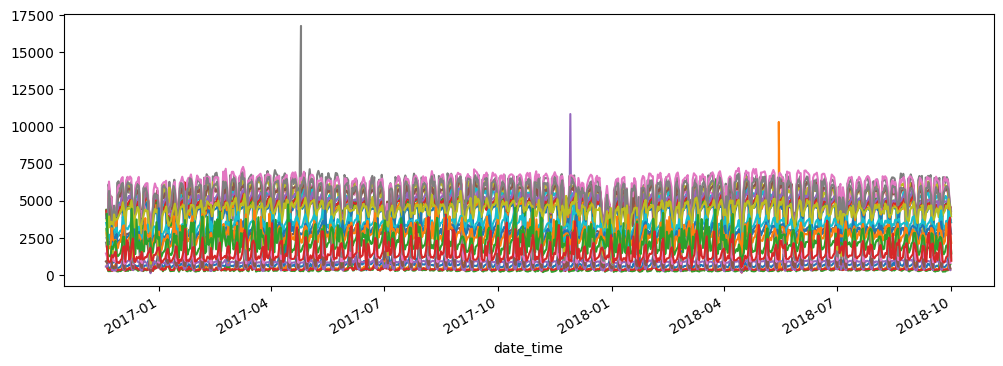

In [254]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.hour)["traffic_volume"].plot()

<Axes: xlabel='date_time'>

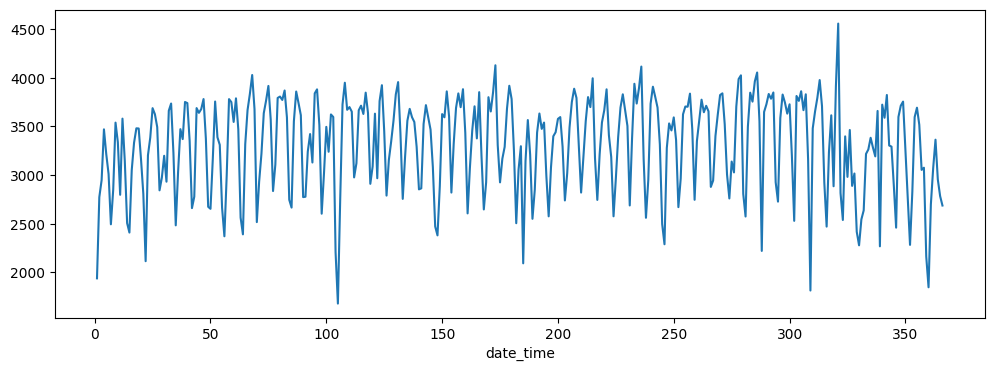

In [258]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.dayofyear)["traffic_volume"].mean().plot()

<Axes: xlabel='date_time'>

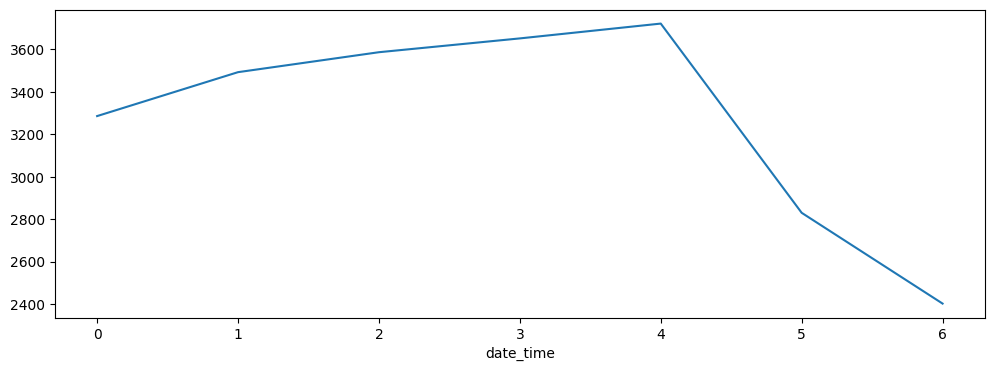

In [257]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.dayofweek)["traffic_volume"].mean().plot()

<Axes: xlabel='date_time'>

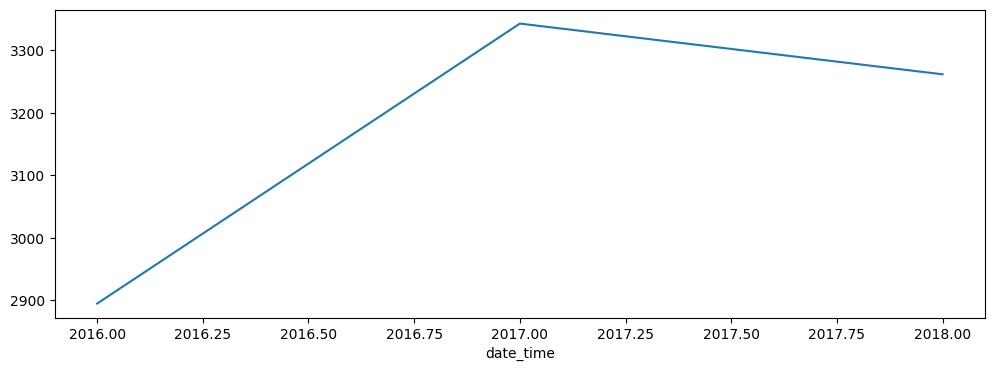

In [256]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.year)["traffic_volume"].mean().plot()

<Axes: xlabel='date_time'>

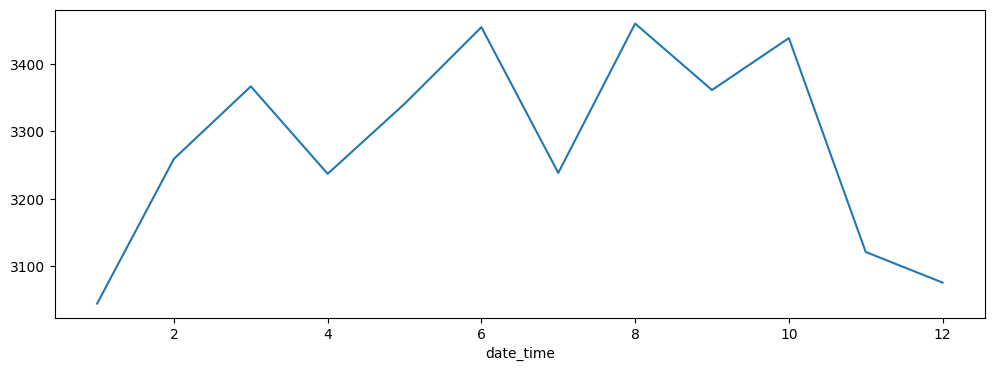

In [255]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.month)["traffic_volume"].mean().plot()

<Axes: xlabel='date_time'>

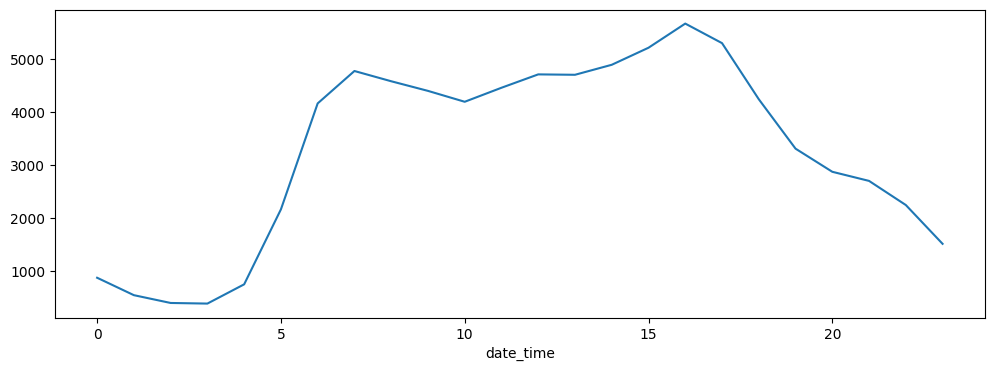

In [253]:
plt.subplots(figsize=(12, 4))

df.groupby(df.index.hour)["traffic_volume"].mean().plot()

In [97]:
df.describe()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,DayOfTheWeek,Month,DayOfTheYear,prev_traffic_volume,diff_traffic_volume
count,19958.000000,19958.000000,19958.000000,19958.0,19958.000000,19958.000000,19958.000000,19958.000000,19958.000000,19958.000000
mean,3278.461118,281.173261,0.048497,0.0,49.347179,2.970789,6.282142,2017.326937,3277.798274,0.022497
std,1977.517827,12.665930,0.398419,0.0,39.645314,2.015349,3.420741,0.601968,796.174868,765.593395
min,113.000000,243.390000,0.000000,0.0,0.000000,0.000000,1.000000,2016.000000,306.625000,-10061.000000
25%,1228.250000,271.950000,0.000000,0.0,1.000000,1.000000,3.000000,2017.000000,2786.864583,-404.000000
50%,3428.000000,281.860000,0.000000,0.0,75.000000,3.000000,6.000000,2017.000000,3423.479167,0.000000
75%,4928.000000,291.840000,0.000000,0.0,90.000000,5.000000,9.000000,2018.000000,3767.833333,255.000000
max,16781.000000,310.070000,10.600000,0.0,92.000000,6.000000,12.000000,2018.000000,5581.750000,11164.000000


<Axes: xlabel='date_time'>

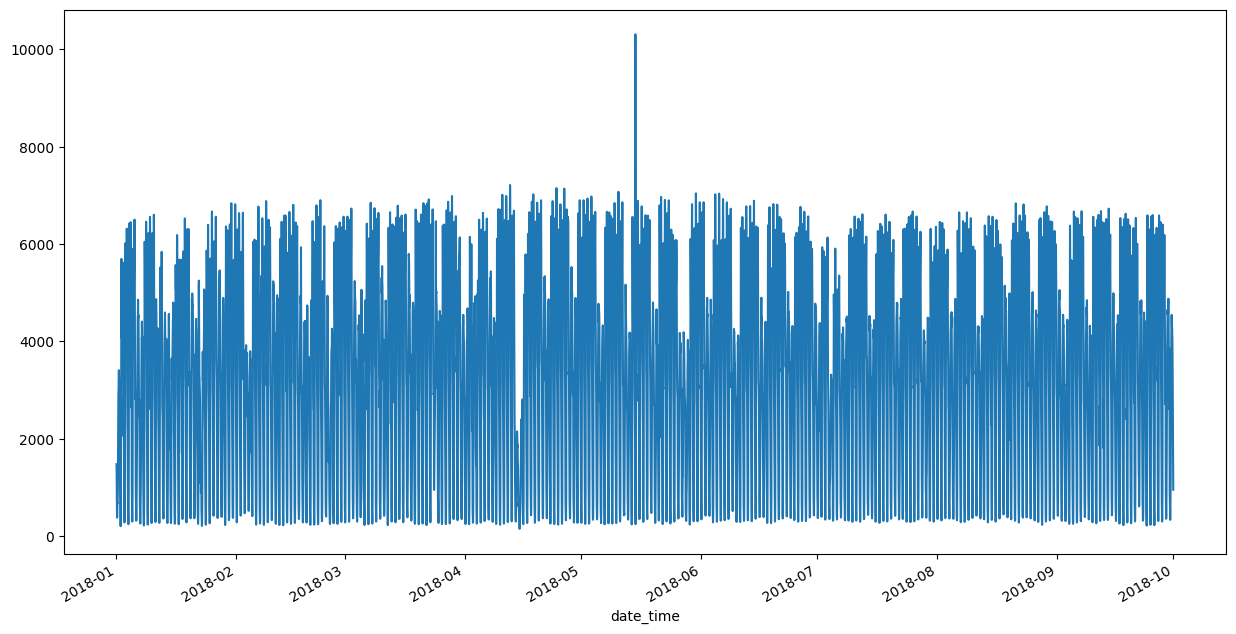

In [104]:
plt.figure(figsize=(15,8))
df['traffic_volume']['2018'].plot()

<Axes: xlabel='date_time'>

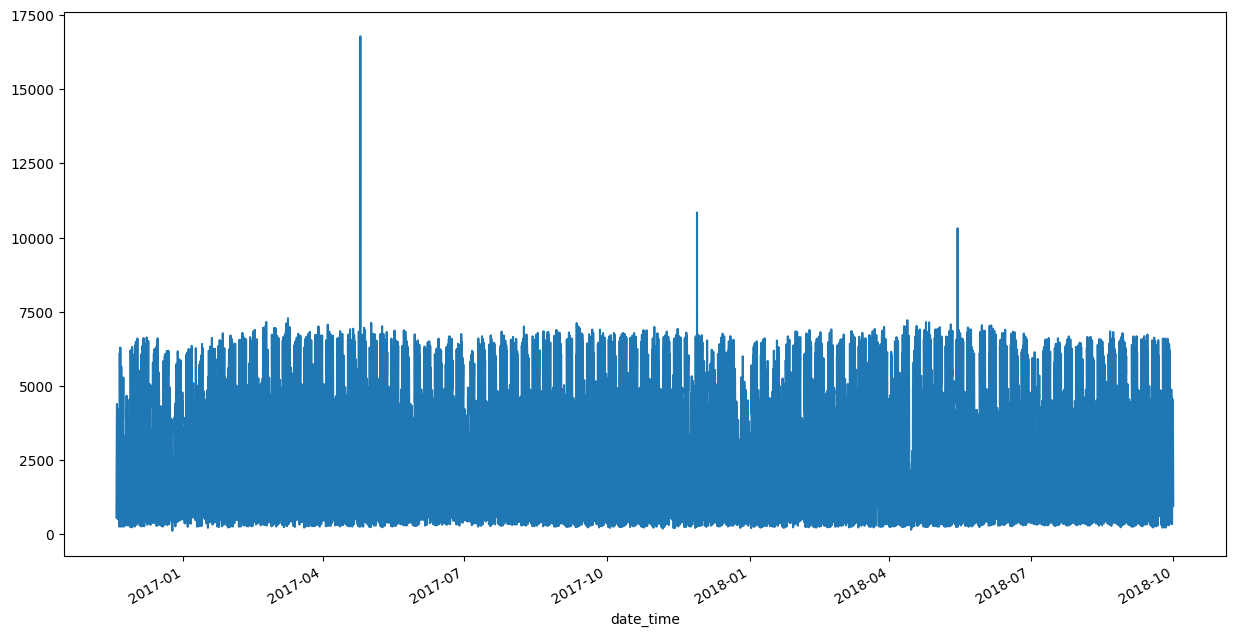

In [101]:
plt.figure(figsize=(15,8))
df['traffic_volume'].plot()

In [245]:
import numpy as np

df_zscore = (df2['traffic_volume'] - df2['traffic_volume'].mean())/df2['traffic_volume'].std()

new_df = df2[(df_zscore<-3) | (df_zscore>3)]

data_without_outliers = df2['traffic_volume'].copy()
data_without_outliers['traffic_volume'] = np.where(df_zscore, df2['traffic_volume'].ffill(), df2['traffic_volume'])

In [266]:
def iqr_outliers_flag(s):
    q1, q3 = np.quantile(s, [0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q1 + 1.5 * iqr
    lower_bound = q3 - 1.5 * iqr

    return (s<lower_bound) | (s>upper_bound)

data_without_outliers = df['traffic_volume'].copy()
iqr_outliers_flag(data_without_outliers)
data_without_outliers['traffic_volume'] = np.where(iqr_outliers_flag(data_without_outliers), df['traffic_volume'].ffill(), df['traffic_volume'])

<Axes: xlabel='date_time'>

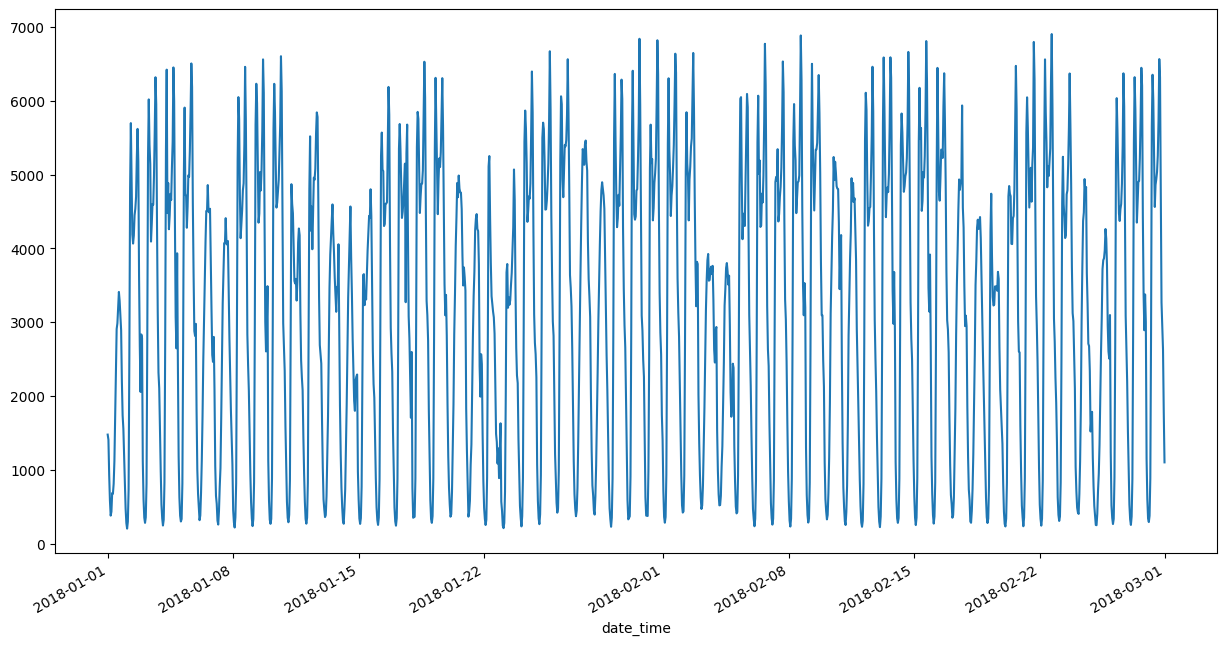

In [106]:
plt.figure(figsize=(15,8))
df['traffic_volume']['2018-01':'2018-02'].plot()

<Axes: xlabel='date_time'>

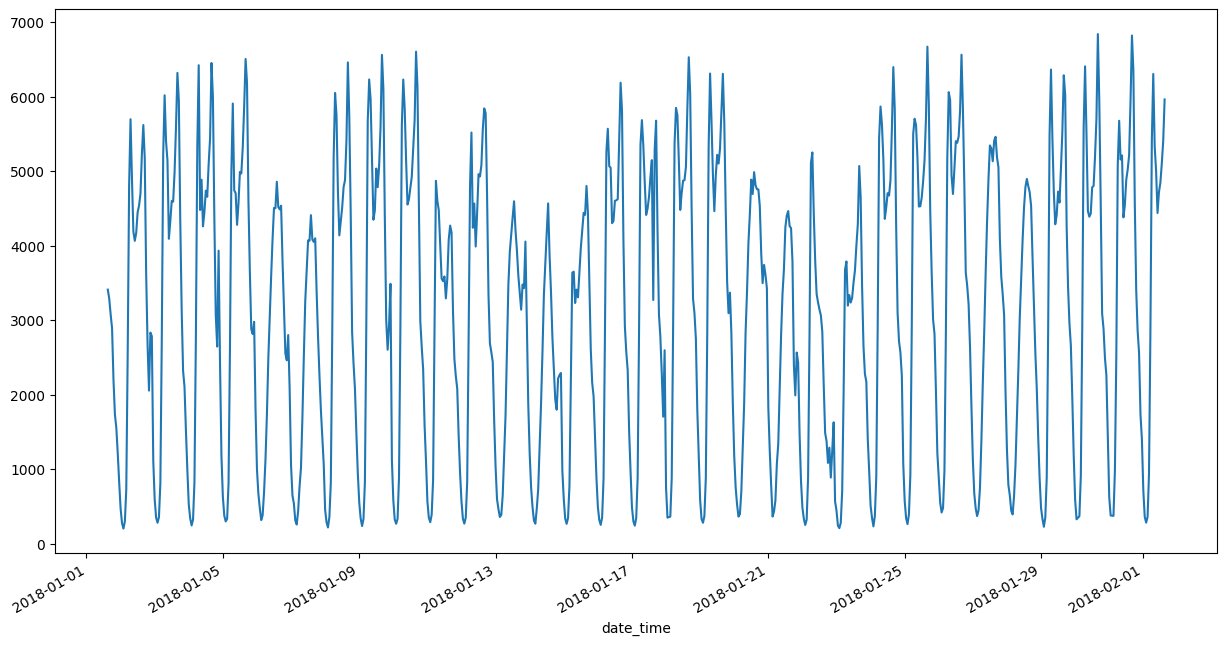

In [107]:
plt.figure(figsize=(15,8))
df['traffic_volume']['2018-01 15:00:00':'2018-02 15:00:00'].plot()

In [74]:
df['prev_traffic_volume'] = df['traffic_volume'].rolling(window=24).mean()

In [75]:
df.head(50)

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,DayOfTheWeek,Month,DayOfTheYear,prev_traffic_volume
date_time,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4,11,2016,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4,11,2016,NaN
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4,11,2016,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4,11,2016,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,4,11,2016,NaN
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Snow,heavy snow,4,11,2016,NaN
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Snow,heavy snow,4,11,2016,NaN
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Mist,mist,4,11,2016,NaN
2016-11-18 17:00:00,4328.0,273.62,0.0,0.0,90,Fog,fog,4,11,2016,NaN


In [76]:
df.dropna(inplace=True)

In [54]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'DayOfTheWeek', 'Month',
       'DayOfTheYear'],
      dtype='object')

In [77]:
df['diff_traffic_volume'] = df['traffic_volume'].diff()

In [78]:
df.dropna(inplace=True)

In [79]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'DayOfTheWeek', 'Month',
       'DayOfTheYear', 'prev_traffic_volume', 'diff_traffic_volume'],
      dtype='object')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19958 entries, 2016-11-19 04:00:00 to 2018-09-30 23:00:00
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19958 non-null  float64
 1   temp                 19958 non-null  float64
 2   rain_1h              19958 non-null  float64
 3   snow_1h              19958 non-null  float64
 4   clouds_all           19958 non-null  int64  
 5   weather_main         19958 non-null  object 
 6   weather_description  19958 non-null  object 
 7   DayOfTheWeek         19958 non-null  int32  
 8   Month                19958 non-null  int32  
 9   DayOfTheYear         19958 non-null  int32  
 10  prev_traffic_volume  19958 non-null  float64
 11  diff_traffic_volume  19958 non-null  float64
dtypes: float64(6), int32(3), int64(1), object(2)
memory usage: 1.8+ MB


In [86]:
columns_numeric = df[['traffic_volume', 'temp', 'rain_1h', 'clouds_all',
       'DayOfTheWeek', 'Month',
       'DayOfTheYear', 'prev_traffic_volume', 'diff_traffic_volume']]

In [117]:
columns_numeric.corr()['traffic_volume']

,traffic_volume
traffic_volume,1.000000
temp,0.131752
rain_1h,0.012792
clouds_all,0.094912
DayOfTheWeek,-0.137995
Month,0.002392
DayOfTheYear,0.017278
prev_traffic_volume,0.129536
diff_traffic_volume,0.193536


<Axes: >

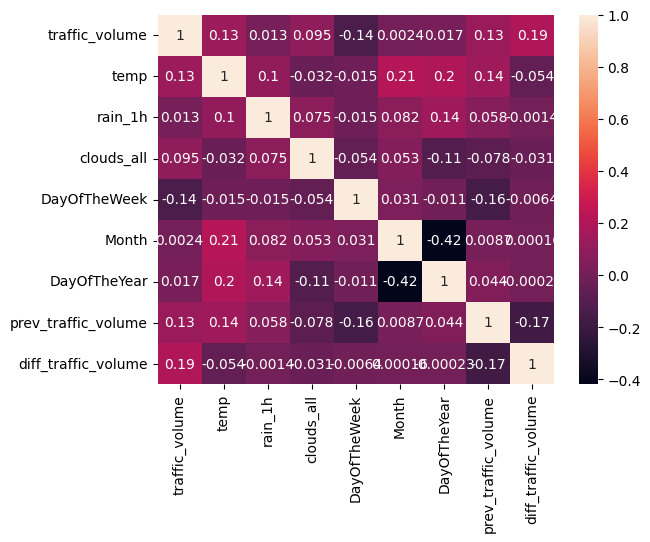

In [89]:
sns.heatmap(columns_numeric.corr(), annot=True)

In [81]:
coded = pd.get_dummies(df[['weather_main', 'weather_description']])

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [139]:
df_spec = df[['traffic_volume', 'temp', 'prev_traffic_volume', 'diff_traffic_volume']]

train, test = train_test_split(df_spec, test_size=0.3, shuffle=False)
val, test = train_test_split(test, test_size=0.5, shuffle=False)

features_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

train_data = features_scaler.fit_transform(train['traffic_volume'])
train_data = target_scaler.fit_transform(train[['temp', 'prev_traffic_volume', 'diff_traffic_volume']])

val_data = features_scaler.fit_transform(train['traffic_volume'])
val_data = .fit_transform(train[['temp', 'prev_traffic_volume', 'diff_traffic_volume']])

train_data = features_scaler.fit_transform(train['traffic_volume'])
train_data = target_scaler.fit_transform(train[['temp', 'prev_traffic_volume', 'diff_traffic_volume']])

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

In [148]:
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train)

val_data = scaler.fit_transform(val)

train_data = scaler.fit_transform(test)

In [150]:
train_d.shape

(13970, 3)

In [151]:
val_d.shape

(13970, 3)

In [152]:
test_d.shape

(13970, 3)

In [154]:
window = 24
train_data = timeseries_dataset_from_array(
    train_d,
    targets=train_d[window:,0],
    sequence_length=window,
    batch_size=32
)

window = 24
val_data = timeseries_dataset_from_array(
    val_d,
    targets=val_d[window:,0],
    sequence_length=window,
    batch_size=32
)

window = 24
test_data = timeseries_dataset_from_array(
    test_d,
    targets=test_d[window:,0],
    sequence_length=window,
    batch_size=32
)

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [172]:
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50, return_sequences=True),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_rnn = model_rnn.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - loss: 0.0231 - mae: 0.1109 - val_loss: 0.0346 - val_mae: 0.1516
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.0144 - mae: 0.0974 - val_loss: 0.0449 - val_mae: 0.1699
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0196 - mae: 0.1093 - val_loss: 0.0394 - val_mae: 0.1591
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - loss: 0.0194 - mae: 0.1074 - val_loss: 0.0374 - val_mae: 0.1556
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.0184 - mae: 0.1042 - val_loss: 0.0370 - val_mae: 0.1548
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.0181 - mae: 0.1032 - val_loss: 0.0369 - val_mae: 0.1547
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 17s 38ms/step - loss: 0.0179 - mae: 0.1026 - val_loss: 0.0370 - val_mae: 0.1551
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - loss: 0.0173 - mae: 0.1005 - val_loss: 0.0376 - val_mae: 0.1559
Epoch 9/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 

In [173]:
model_rnn.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0292 - mae: 0.1300


[0.0371885821223259, 0.15608873963356018]

In [193]:
pred_train_rnn = model_rnn.predict(train_data)
pred_val_rnn= model_rnn.predict(val_data)
pred_test_rnn= model_rnn.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


In [197]:
pred_train_rnn.shape

(13946, 24, 1)

In [202]:
pred_train_rnn

array([[[0.48431972],
        [0.48340735],
        [0.5009421 ],
        ...,
        [0.50858194],
        [0.50849515],
        [0.5085744 ]],

       [[0.4835895 ],
        [0.48640436],
        [0.49976242],
        ...,
        [0.50850517],
        [0.50856966],
        [0.50861067]],

       [[0.4831795 ],
        [0.4868214 ],
        [0.49958587],
        ...,
        [0.50858074],
        [0.5086048 ],
        [0.5086058 ]],

       ...,

       [[0.4324266 ],
        [0.44767255],
        [0.468902  ],
        ...,
        [0.5084669 ],
        [0.5084471 ],
        [0.50844413]],

       [[0.43936124],
        [0.44826284],
        [0.46371293],
        ...,
        [0.50844914],
        [0.5084449 ],
        [0.5084596 ]],

       [[0.43461204],
        [0.44633895],
        [0.4583433 ],
        ...,
        [0.508448  ],
        [0.5084594 ],
        [0.50843954]]], dtype=float32)

In [ ]:
pred_train_rnn = scaler.inverse_transform(pd.to_numeric(train_data))
pred_val_rnn= scaler.inverse_transform(pd.to_numeric(val_data))
pred_test_rnn= scaler.inverse_transform(pd.to_numeric(test_data))

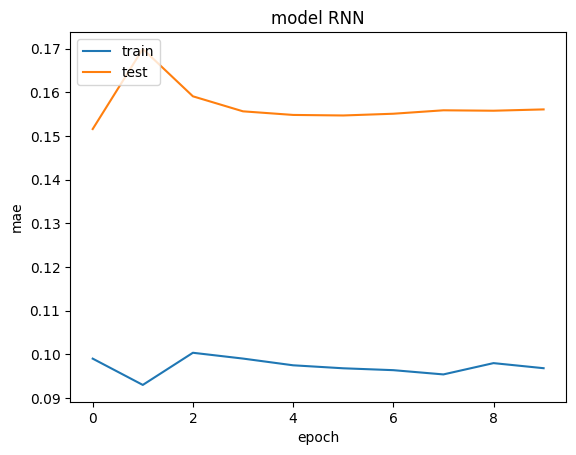

In [175]:
plt.plot(history_rnn.history['mae'])
plt.plot(history_rnn.history['val_mae'])
plt.title('model RNN')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [179]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50, return_sequences=True),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = model_lstm.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 31s 58ms/step - loss: 0.0350 - mae: 0.1429 - val_loss: 0.0500 - val_mae: 0.1815
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 0.0122 - mae: 0.0895 - val_loss: 0.0519 - val_mae: 0.1860
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 46s 70ms/step - loss: 0.0110 - mae: 0.0856 - val_loss: 0.0396 - val_mae: 0.1608
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 57ms/step - loss: 0.0085 - mae: 0.0743 - val_loss: 0.0293 - val_mae: 0.1365
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - loss: 0.0070 - mae: 0.0664 - val_loss: 0.0229 - val_mae: 0.1190
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 66ms/step - loss: 0.0062 - mae: 0.0611 - val_loss: 0.0207 - val_mae: 0.1125
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step - loss: 0.0059 - mae: 0.0592 - val_loss: 0.0193 - val_mae: 0.1084
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - loss: 0.0057 - mae: 0.0580 - val_loss: 0.0184 - val_mae: 0.1055
Epoch 9/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 

In [180]:
model_lstm.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0125 - mae: 0.0811


[0.016854023560881615, 0.10056916624307632]

In [181]:
pred= model_lstm.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


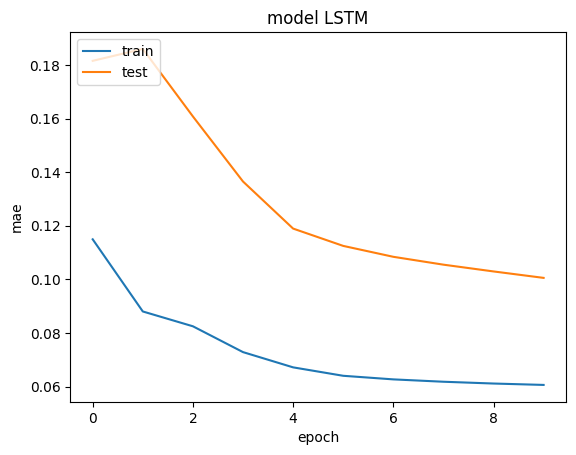

In [182]:
plt.plot(history_lstm.history['mae'])
plt.plot(history_lstm.history['val_mae'])
plt.title('model LSTM')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [183]:
model_gru = Sequential([
    GRU(50, return_sequences=True),
    GRU(50, return_sequences=True),
    GRU(50, return_sequences=True),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_gru = model_gru.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 37s 69ms/step - loss: 0.0205 - mae: 0.1108 - val_loss: 0.0239 - val_mae: 0.1245
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0092 - mae: 0.0759 - val_loss: 0.0190 - val_mae: 0.1096
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0075 - mae: 0.0673 - val_loss: 0.0161 - val_mae: 0.1005
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 32s 73ms/step - loss: 0.0067 - mae: 0.0633 - val_loss: 0.0153 - val_mae: 0.0982
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0063 - mae: 0.0610 - val_loss: 0.0149 - val_mae: 0.0962
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.0059 - mae: 0.0593 - val_loss: 0.0155 - val_mae: 0.0977
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - loss: 0.0059 - mae: 0.0588 - val_loss: 0.0158 - val_mae: 0.0982
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 40s 66ms/step - loss: 0.0057 - mae: 0.0582 - val_loss: 0.0160 - val_mae: 0.0987
Epoch 9/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 

In [184]:
model_gru.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - loss: 0.0119 - mae: 0.0795


[0.015938961878418922, 0.09828061610460281]

In [185]:
pred= model_gru.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step


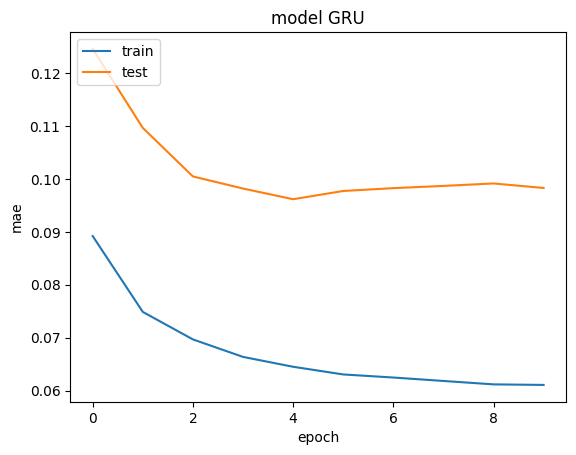

In [186]:
plt.plot(history_gru.history['mae'])
plt.plot(history_gru.history['val_mae'])
plt.title('model GRU')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Additional: UniCase

In [270]:
df_spec2 = df[['traffic_volume']]

train, test = train_test_split(df_spec2, test_size=0.3, shuffle=False)
val, test = train_test_split(test, test_size=0.5, shuffle=False)

In [272]:
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train)

val_data = scaler.fit_transform(val)

train_data = scaler.fit_transform(test)

In [273]:
window = 24
train_data = timeseries_dataset_from_array(
    train_d,
    targets=train_d[window:,0],
    sequence_length=window,
    batch_size=32
)

window = 24
val_data = timeseries_dataset_from_array(
    val_d,
    targets=val_d[window:,0],
    sequence_length=window,
    batch_size=32
)

window = 24
test_data = timeseries_dataset_from_array(
    test_d,
    targets=test_d[window:,0],
    sequence_length=window,
    batch_size=32
)

In [285]:
model_rnn = Sequential([
    SimpleRNN(50, return_sequences=True),
    SimpleRNN(50),
    Dense(1)
])
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_rnn = model_rnn.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 15s 28ms/step - loss: 0.0207 - mae: 0.1035 - val_loss: 0.0106 - val_mae: 0.0847
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - loss: 0.0015 - mae: 0.0309 - val_loss: 0.0035 - val_mae: 0.0461
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 8.5845e-04 - mae: 0.0229 - val_loss: 0.0021 - val_mae: 0.0359
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - loss: 7.1277e-04 - mae: 0.0209 - val_loss: 0.0014 - val_mae: 0.0288
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step - loss: 7.1217e-04 - mae: 0.0205 - val_loss: 9.7244e-04 - val_mae: 0.0241
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 5.3142e-04 - mae: 0.0177 - val_loss: 7.7213e-04 - val_mae: 0.0214
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 4.4191e-04 - mae: 0.0160 - val_loss: 6.8886e-04 - val_mae: 0.0202
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 4.0917e-04 - mae: 0.0153 - val_loss: 6.3507e-04 - val_mae: 0.0193


In [286]:
model_rnn.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 4.6912e-04 - mae: 0.0161


[0.0006202766089700162, 0.01937919296324253]

In [287]:
pred_train_rnn = model_rnn.predict(train_data)
pred_val_rnn= model_rnn.predict(val_data)
pred_test_rnn= model_rnn.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step
436/436 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


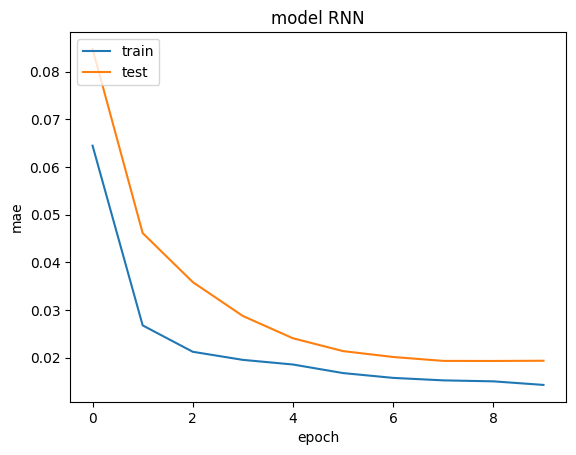

In [288]:
plt.plot(history_rnn.history['mae'])
plt.plot(history_rnn.history['val_mae'])
plt.title('model RNN')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [289]:
model_lstm = Sequential([
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_lstm = model_lstm.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - loss: 0.0218 - mae: 0.1056 - val_loss: 0.0113 - val_mae: 0.0833
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - loss: 0.0043 - mae: 0.0507 - val_loss: 0.0035 - val_mae: 0.0458
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 0.0015 - mae: 0.0293 - val_loss: 0.0013 - val_mae: 0.0277
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 6.6860e-04 - mae: 0.0196 - val_loss: 7.0990e-04 - val_mae: 0.0204
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - loss: 4.2112e-04 - mae: 0.0154 - val_loss: 6.7265e-04 - val_mae: 0.0202
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 3.3222e-04 - mae: 0.0137 - val_loss: 8.0172e-04 - val_mae: 0.0226
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 18s 42ms/step - loss: 2.9044e-04 - mae: 0.0129 - val_loss: 7.1371e-04 - val_mae: 0.0215
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - loss: 2.3808e-04 - mae: 0.0115 - val_loss: 4.9144e-04 - val_mae: 0.0176


In [290]:
model_lstm.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.6893e-04 - mae: 0.0089


[0.0002030619652941823, 0.010376056656241417]

In [291]:
pred= model_lstm.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step


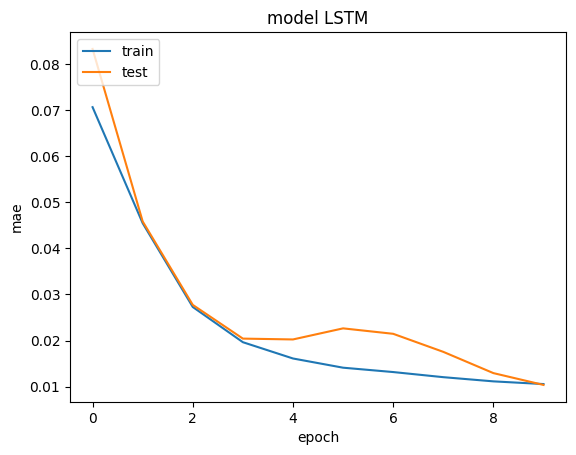

In [292]:
plt.plot(history_lstm.history['mae'])
plt.plot(history_lstm.history['val_mae'])
plt.title('model LSTM')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [293]:
model_gru = Sequential([
    GRU(50, return_sequences=True),
    GRU(50),
    Dense(1)
])
model_gru.compile(optimizer='adam', loss='mse', metrics=['mae'])

history_gru = model_gru.fit(train_data, epochs=10, batch_size=32, validation_data=val_data)

Epoch 1/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 25s 49ms/step - loss: 0.0074 - mae: 0.0615 - val_loss: 5.9176e-04 - val_mae: 0.0177
Epoch 2/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 3.4985e-04 - mae: 0.0136 - val_loss: 0.0010 - val_mae: 0.0260
Epoch 3/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 2.7513e-04 - mae: 0.0124 - val_loss: 4.4900e-04 - val_mae: 0.0166
Epoch 4/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - loss: 1.8259e-04 - mae: 0.0097 - val_loss: 5.3422e-04 - val_mae: 0.0188
Epoch 5/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - loss: 1.7065e-04 - mae: 0.0094 - val_loss: 7.2749e-04 - val_mae: 0.0222
Epoch 6/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - loss: 1.9591e-04 - mae: 0.0105 - val_loss: 7.3332e-04 - val_mae: 0.0220
Epoch 7/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 2.0796e-04 - mae: 0.0109 - val_loss: 7.1052e-04 - val_mae: 0.0215
Epoch 8/10
436/436 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - loss: 2.0573e-04 - mae: 0.0109 - val_loss: 6.9300e-04 - 

In [294]:
model_gru.evaluate(val_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 5.2507e-04 - mae: 0.0176


[0.0006835170788690448, 0.020822890102863312]

In [295]:
pred= model_gru.predict(test_data)

436/436 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step


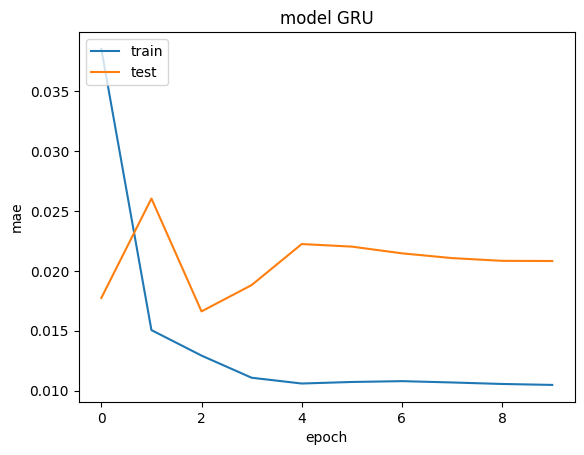

In [296]:
plt.plot(history_gru.history['mae'])
plt.plot(history_gru.history['val_mae'])
plt.title('model GRU')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?
6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.

In [297]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'weather_description', 'DayOfTheWeek', 'Month',
       'DayOfTheYear', 'prev_traffic_volume', 'diff_traffic_volume'],
      dtype='object')

## Answer Here:

Q(1)- At first, I checked the dataset in general, and I discovered it contains duplicates, null values (just in traffic volume column) and outliers, so I dropped the duplicated values, fill the null by ffill function for forward fill, and removed the outliers by IQR method, in addition, after splitting the data, I choosed MinMaxScaler to normalize the data and make it between 0, 1 to facilitate the training process

Q(2)- I created these columns: prev_traffic_volume column to generate the mean after each 24 hours in traffic_volumne column (the window is 24, in addition it generated 24 null values in the top 24 rows so I dropped them), the diff_traffic_volume to generate the difference in the traffic_volumne (it generated 1 null value in the top row and I dropped it), DayOfTheWeek, Month, and DayOfTheYear columns and visualize each one of them, and in data selection (multi case) I choosed ['traffic_volume', 'temp', 'prev_traffic_volume', 'diff_traffic_volume'] columns because of the most near corrilation to the target

Q(3, 7)- I choose a simplfied architechture for all the RNN, LSTM and GRU models do prevent overfitting, however in multicase models, there are a bit of overfitting because I discovered that the number of layers are high and make complicated model, and in a cases that aren't in time limitation (as now), I suggest to implement normalization such as batchnormalization, earlystopping, dropout, l2 requlaization and so on, on the other hand, in unicase, the results (in RNN and LSTM) there are no overfitting on the data becase of the convinient number of layers, and in unicase, surpisingly the results are much more better and the mae is lower than most of the multicase models, in addition the final layer is Dense layer with units = 1 because we desire just one value (numeric value)

Q(4)- For the time limitation, and to prevent overfitting, I used 10 epochs on each model (uni or multi case models) and based on the results, the number of epochs initially seems convinience on the training based on the results

Q(5)- I choose the loss function to be MSE and the metrics MAE because we want to measure the amount of error in our regression result using these equations

Q(8)- We can use XGBoost for training because it's suitable for time-series dataset, we can expand the dataset and train it to make more accurace predictions, we could visualize the testing and validation to measure the prediction with visuals, and make tuning for best parameters


##Additional: based on the models results:


###In multicase:

**RNN**: mae: 0.1300 with high overfitting

**LSTM**: mae: 0.0811 with little overfitting

**GRU**: mae: 0.0795 with little overfitting


###In unicase:

**RNN**: mae: 0.0161 with no overfitting

**LSTM**: mae: 0.0089 with no overfitting

**GRU**: mae: 0.0176 with little overfitting


### **Best result**: uni LSTM with mae: 0.0089